In [4]:
import os, sys
sys.path.append(os.path.dirname("../models"))
from models.classifiers import SplitVotingEnsemble, SplitVotingEnsembleLGBM, kfold_cv
from lightgbm import LGBMClassifier 
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from HELPpy.models.prediction import VotingEnsembleLGBM
#clf = RandomForestClassifier()
clf = LGBMClassifier(n_estimators=200)
svclf = SplitVotingEnsemble(clf, verbose=True)
#svclf = SplitVotingEnsembleLGBM(verbose=True)
#svclf = VotingEnsembleLGBM(verbose=True)
from sklearn.datasets import load_iris
data = load_iris()
#X = pd.DataFrame(data.data, columns=data.feature_names)
#Y = pd.DataFrame(data['target'], columns=['target'])
X = pd.read_csv("../../data/Kidney_BIO.csv", index_col=0)
#Y = pd.read_csv("../../data/Kidney_HELP.csv", index_col=0).replace({'sNE':0, 'aE':0, 'E':2})
#Y = pd.read_csv("../../data/Kidney_HELP.csv", index_col=0).replace({'sNE':0.0, 'aE':0.0, 'E':1.0})
Y = pd.read_csv("../../data/Kidney_HELP.csv", index_col=0).replace({'sNE':'NE', 'aE':'NE', 'E':'E'})
#Y = pd.read_csv("../../data/Kidney_HELP.csv", index_col=0).replace({'sNE':0, 'aE':0, 'E':1})
shdgenes = np.intersect1d(X.index.values, Y.index.values)
X = X.loc[shdgenes]
Y = Y.loc[shdgenes]
preds = svclf.fit(X,Y).predict(X)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y, preds)

Major label 1 15994, 2nd major label 0 1242- n. voters 13 - sorted [1 0]


0.9021820682756034

Classification with SplitVotingEnsemble...


5-fold:   0%|          | 0/5 [00:00<?, ?it/s]

,measure
ROC-AUC,0.9126±0.0049
Accuracy,0.7906±0.0081
BA,0.8281±0.0029
Sensitivity,0.7842±0.0094
Specificity,0.8720±0.0106
MCC,0.3855±0.0061
CM,"[[1083, 159], [3451, 12543]]"


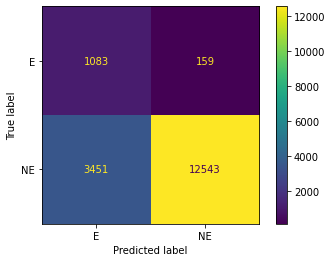

In [10]:
from HELPpy.models.prediction import k_fold_cv
from xgboost import XGBClassifier
X = X.fillna(X.mean())
clf = LGBMClassifier(n_estimators=200)
svclf = SplitVotingEnsemble(clf)
df_scores, scores, predictions = skfold_cv(X, Y, svclf, n_splits=5, seed=0, show_progress=True, verbose=True)
df_scores

In [3]:
svclf.class_mapping_

AttributeError: 'SplitVotingEnsemble' object has no attribute 'class_mapping_'

In [ ]:
predictions

,label,prediction,probabilities
gene,,,
A1CF,0,0,0.999246
A2M,0,2,0.492280
AAGAB,0,0,0.665028
AARD,0,0,0.999324
AASDH,0,2,0.476863
...,...,...,...
ZSWIM7,0,0,0.983311
ZSWIM8,0,2,0.316870
ZXDA,0,0,0.996721


In [ ]:
svclf.get_params()

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'n_estimators': 200,
 'n_jobs': -1,
 'n_voters': -1,
 'random_state': 42,
 'verbose': True,
 'voting': 'soft'}